In [1]:
df=pd.read_excel("E:\HTL Project\HTL Raw data.xlsx")
df.head()

<IPython.core.display.Javascript object>

,Feedstock,Type,Moisture,Volatile,Ash,Proteins,lipids,carbohydrates,C,H,...,O,S,Culture Condition,Catalyst,Temp,Time,Pressure,HHV,ERR,Yield%
0,Spirulina platensis,microalgae,11.8,67.0,8.6,53.0,7.5,11.0,72.7,8.8,...,11.5,0.6,open pond,Na2CO3,300,30,130,35.2,37.2,36.0
1,Nannochloropsis,microalgae,3.9,67.4,24.4,52.0,14.0,27.0,76.0,10.3,...,9.0,0.8,Flask,H-ZSM5,350,60,180,37.9,42.7,43.0
2,Chlorella vulgaris,microalgae,5.8,67.3,9.5,49.5,11.0,14.2,70.6,9.2,...,12.3,0.4,open pond,LiOH,250,60,100,33.8,33.0,33.0
3,Porphyridium purpureum,microalgae,8.5,61.6,18.5,45.6,12.1,NaN,69.1,8.4,...,15.2,0.5,PBR,NaN,250,30,100,34.8,41.5,24.7
4,Dunaliella tertiolecta,microalgae,4.9,54.4,13.5,34.0,23.0,21.0,72.0,8.8,...,9.9,0.3,NaN,Na2CO3,375,50,221,36.0,64.8,55.3


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Feedstock']=le.fit_transform(df['Feedstock'])
df['Type']=le.fit_transform(df['Type'])
df['Culture Condition']=le.fit_transform(df['Culture Condition'])
df['Catalyst']=le.fit_transform(df['Catalyst'])

In [3]:
df['Moisture']=df['Moisture'].fillna(df['Moisture'].mode()[0])
df['Volatile']=df['Volatile'].fillna(df['Volatile'].mode()[0])
df['carbohydrates']=df['carbohydrates'].fillna(df['carbohydrates'].mode()[0])
df['S']=df['S'].fillna(df['S'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])
df['lipids ']=df['lipids '].fillna(df['lipids '].mode()[0])

In [12]:
x=df.drop('HHV',axis=1)
y=df['HHV']
from sklearn.feature_selection import SelectFromModel
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)
print(encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(encoded))
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=80)
clf.fit(x_train,encoded)
y_pred =clf.predict(x_test)
y_pred
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
clf1 = tree.DecisionTreeClassifier(random_state=80)
clf1.fit(x_train,encoded)
y_pred1 =clf1.predict(x_train)
y_pred1
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

[37 30 18 36  9  1  5  0 22 28 10 40  9 21  7 13  9 16 32 16  0 35  7 12
 34 23  9  9  3  9 16  4  9  7  9  9 38 41 37  9 29 30 26 16 32 11  9  4
  4 25 17  0  8  2 34 22  7  0 39 29 31 27 35 14  9  2 19  6 23 32 20  9
 24 20 37  4 15 33  7  4]
continuous
multiclass
multiclass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  14.169999999999998


<IPython.core.display.Javascript object>

Root mean square error:  190.71609999999995
R2 square:  -0.63179281772179


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  11.702499999999993


<IPython.core.display.Javascript object>

Root mean square error:  131.15975624999984
R2 square:  -0.1756856493372303


In [13]:
params = {
    'max_depth': [10,20,30,40,50]
}

In [14]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=clf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=4, verbose=2)

In [15]:
rf_grid.fit(x_train,encoded)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=80), n_jobs=4,
             param_grid={'max_depth': [10, 20, 30, 40, 50]}, verbose=2)

In [16]:
rf_grid.best_params_

{'max_depth': 30}

In [17]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
78,25.9,9
5,35.5,37
34,34.9,32
30,21.5,7
64,34.7,35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

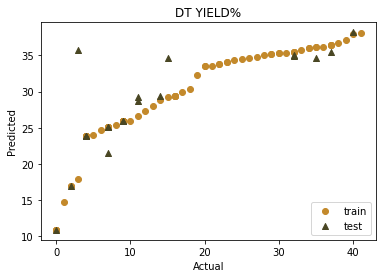

In [18]:
plt.scatter(y_pred1,y_train,label='train',color='#c3892b')
plt.scatter(y_pred,y_test,label='test',color='#494623',marker ="^")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("DT YIELD%")
plt.legend()